In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

%matplotlib inline

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Preparation Dataset

In [7]:
df.fillna(0, inplace=True)

In [9]:
df['median_house_value'] = np.log1p(df['median_house_value'])

In [15]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,11.265758,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,11.252872,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,11.432810,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,11.346883,INLAND


In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values


del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [17]:
dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

In [47]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

# Question 1
Let's train a decision tree regressor to predict the median_house_value variable.

    Train a model with max_depth=1.

Which feature is used for splitting the data?

    ocean_proximity
    total_rooms
    latitude
    population



In [20]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [21]:
print(export_text(dtr, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



# Question 2

Train a random forest model with these parameters:

    n_estimators=10
    random_state=1
    n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

    0.045
    0.245
    0.545
    0.845


In [22]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [24]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [25]:
y_pred = rfr.predict(X_val)

In [28]:
print(mean_squared_error(y_val, y_pred))

0.0599813172066949


# Question 3
Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10.
    Set random_state to 1.
    Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

    10
    25
    50
    160


In [30]:
scores = []

for n in range(10, 201, 10):
    rfc = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred)
    
    scores.append((n, rmse))

In [34]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores.sort_values(by='rmse', ascending=True)

,n_estimators,rmse
16,170,0.054439
15,160,0.054445
14,150,0.054521
17,180,0.054554
13,140,0.054577
12,130,0.054656
19,200,0.054668
18,190,0.054685
11,120,0.054720
6,70,0.054762


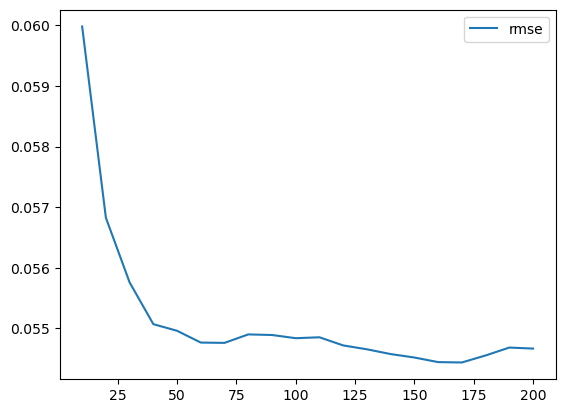

In [35]:
plt.plot(df_scores.n_estimators, df_scores.rmse, label='rmse')
plt.legend()

# Question 4

Let's select the best max_depth:

    Try different values of max_depth: [10, 15, 20, 25]
    For each of these values,
        try different values of n_estimators from 10 till 200 (with step 10)
        calculate the mean RMSE
    Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

    10
    15
    20
    25


In [39]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rfr = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rfr.fit(X_train, y_train)

        y_pred = rfc.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred)

        scores.append((d, n, rmse))

In [40]:
df_scores = pd.DataFrame(scores, columns=[ 'max_depth', 'n_estimators' ,'rmse'])
df_scores.sort_values(by='rmse', ascending=True)

,max_depth,n_estimators,rmse
48,20,90,0.054668
14,10,150,0.054668
79,25,200,0.054668
50,20,110,0.054668
53,20,140,0.054668
...,...,...,...
31,15,120,0.054668
37,15,180,0.054668
21,15,20,0.054668
63,25,40,0.054668


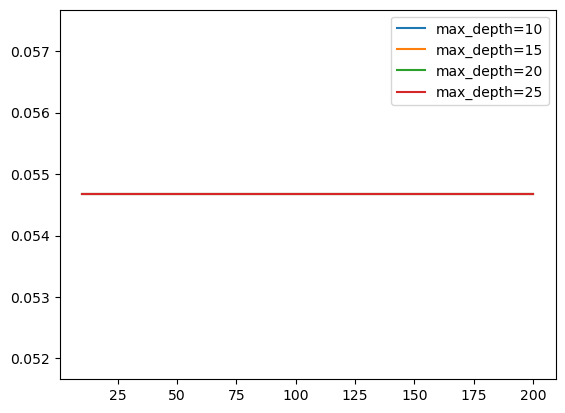

In [41]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

# Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

    Train the model with these parameters:
        n_estimators=10,
        max_depth=20,
        random_state=1,
        n_jobs=-1 (optional)
    Get the feature importance information from this model

What's the most important feature (among these 4)?

    total_rooms
    median_income
    total_bedrooms
    longitude


In [42]:
rfc = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

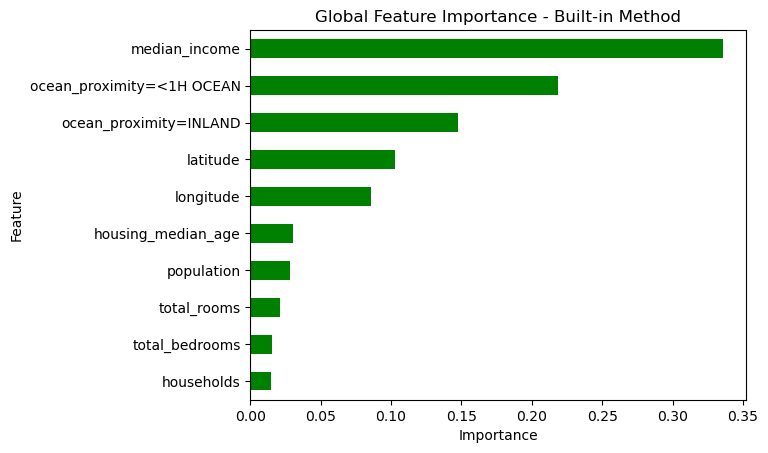

In [49]:
global_importances = pd.Series(rfc.feature_importances_, index=dv.get_feature_names_out(X_train))
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

# Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

    0.3
    0.1
    Both give equal value


In [61]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [62]:
# Clean up feature names
features = [feature.replace('[', '').replace(']', '').replace('<', '') for feature in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [65]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [63]:
# ETA 0.3
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [66]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval= 5, evals=watchlist)

[0]	train-rmse:8.07362	val-rmse:8.07348
[5]	train-rmse:1.38983	val-rmse:1.38852
[10]	train-rmse:0.33195	val-rmse:0.34802
[15]	train-rmse:0.22197	val-rmse:0.25614
[20]	train-rmse:0.20036	val-rmse:0.24508
[25]	train-rmse:0.18991	val-rmse:0.24021
[30]	train-rmse:0.18204	val-rmse:0.23833
[35]	train-rmse:0.17091	val-rmse:0.23452
[40]	train-rmse:0.16422	val-rmse:0.23379
[45]	train-rmse:0.15756	val-rmse:0.23302
[50]	train-rmse:0.15210	val-rmse:0.23262
[55]	train-rmse:0.14633	val-rmse:0.23167
[60]	train-rmse:0.14218	val-rmse:0.23160
[65]	train-rmse:0.13898	val-rmse:0.23169
[70]	train-rmse:0.13471	val-rmse:0.23108
[75]	train-rmse:0.13072	val-rmse:0.23036
[80]	train-rmse:0.12835	val-rmse:0.23045
[85]	train-rmse:0.12534	val-rmse:0.23010
[90]	train-rmse:0.12174	val-rmse:0.22957
[95]	train-rmse:0.11894	val-rmse:0.22906
[99]	train-rmse:0.11656	val-rmse:0.22897


In [68]:
# ETA 0.1
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [69]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval= 5, evals=watchlist)

[0]	train-rmse:10.37456	val-rmse:10.37545
[5]	train-rmse:6.13433	val-rmse:6.13236
[10]	train-rmse:3.63299	val-rmse:3.62939
[15]	train-rmse:2.15901	val-rmse:2.15616
[20]	train-rmse:1.29412	val-rmse:1.29329
[25]	train-rmse:0.78993	val-rmse:0.79342
[30]	train-rmse:0.50217	val-rmse:0.51149
[35]	train-rmse:0.34590	val-rmse:0.36371
[40]	train-rmse:0.26743	val-rmse:0.29345
[45]	train-rmse:0.23014	val-rmse:0.26315
[50]	train-rmse:0.21112	val-rmse:0.24907
[55]	train-rmse:0.20315	val-rmse:0.24427
[60]	train-rmse:0.19724	val-rmse:0.24107
[65]	train-rmse:0.19264	val-rmse:0.23932
[70]	train-rmse:0.18911	val-rmse:0.23824
[75]	train-rmse:0.18503	val-rmse:0.23731
[80]	train-rmse:0.18145	val-rmse:0.23594
[85]	train-rmse:0.17807	val-rmse:0.23475
[90]	train-rmse:0.17418	val-rmse:0.23307
[95]	train-rmse:0.17149	val-rmse:0.23258
[99]	train-rmse:0.17000	val-rmse:0.23234
